In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pathlib import Path
import re
import requests
from io import StringIO
import random
import pdb
from io import BytesIO
import geopandas as gpd

!pip install requests pandas
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bring land use data from Gipuzkoa Irekia, related to locals
Bienes Inmuebles de Naturaleza Urbana existentes en el Catastro de Gipuzkoa

https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/detail/detailView/1d7a519e-5248-4e87-85f7-ecf3d00a1e52

In [ ]:
# Lista con todos los urls a los archivos de locales de los 34 municipios del estudio

urls_locales=['https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c6abbdeb-2583-420d-b6f1-46f37874dbf9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/38f8aa02-307d-48d8-a5fa-eed285d13180',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/b36a2241-b4c4-45fb-8ce4-523c9716741a',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c0ee5e2b-71ce-4c89-8ba9-7a9ef7f4b1b5',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c255519e-d335-406a-be8d-8f2e469ba3f9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/32865b0e-e05e-4b87-8211-61e8526aba6c',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/873c1579-3893-4e44-a221-9a399465593f',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/876d7968-d6b2-4b8c-bbae-899bb35444f6',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/f423a594-00e7-4f4c-9ebf-f3ff352cef51',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/1bd56664-f2b7-42b0-ba25-e54b3d960726',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/4a807b4f-1302-4384-b1fb-bf420ff9f03d',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/1ddf5167-6159-4f7a-b43f-c6e7e92225ba',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/313dc81d-0f1a-4cd8-82e6-d81ae90e5019',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/12088aca-f753-4dd7-814d-4ac5506c41e7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/9c6c71ae-d062-4fa2-b28e-55a9ba9f8de9',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/70dc4dae-d5ed-4397-8ef0-d56f46060b33',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/2722f0eb-7ef2-4c4d-baca-454353f5caed',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/ff1c3ce6-bb6b-4211-9f76-2faacde64ce7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/c1ef8ad8-655a-48fd-8d76-44964f265011',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/7a32f635-e606-44f2-bf8e-3f12468a88d2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/080bfc9b-1909-4832-a428-e92c32cffa2d',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/6498dbc2-71c8-4629-9103-9abafe6374b2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/cdf57eda-5acc-4662-ad98-32c516352027',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/24a8f343-293d-426c-b6ab-7d66e75b8d58',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/6822ee92-e76f-4f53-b192-fbd102fb7763',

      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/de6fa074-0792-4951-89c7-e08d4eae5340',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/805740c6-e11f-43b8-9dbd-7edc994da6b7',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/fbdd7aa7-f1c1-4149-bc74-3995a7c13c2f',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/03bfc3a4-c0d4-491e-a163-ef983aa0403a',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/8773c064-1976-409f-a355-7847f8420d09',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/62434408-12b5-4a7a-84ba-22d5ca426a72',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/e4ab4c6e-af2d-4c9d-b632-8e933193cef2',
      'https://www.gipuzkoairekia.eus/es/datu-irekien-katalogoa/-/openDataSearcher/download/downloadResource/0fa7d40a-81f4-49c3-9414-182ab6fc70e3'
      ]
len(urls_locales)

33

In [ ]:
# Donosti tiene un unico url, pero este solo baja 1 de los 4 archivos de locales que hay. Desastre por su parte.
# Lo descargo manualmente.

locales_donosti_df = []

locales_donosti = ['/content/drive/MyDrive/Code/Data/Locales_Donosti/ficherourbanalocalesmunicipio69.csv',
                   '/content/drive/MyDrive/Code/Data/Locales_Donosti/ficherourbanalocalesmunicipio69-2.csv',
                   '/content/drive/MyDrive/Code/Data/Locales_Donosti/ficherourbanalocalesmunicipio69-3.csv',
                   '/content/drive/MyDrive/Code/Data/Locales_Donosti/ficherourbanalocalesmunicipio69-4.csv'
                   ]

for path in locales_donosti:
    df = gpd.read_file(path, encoding='latin1')
    locales_donosti_df.append(df)
locales_donosti_df = pd.concat(locales_donosti_df, ignore_index=True)
locales_donosti_df = locales_donosti_df.drop(columns='geometry')
locales_donosti_df['Mun'] = locales_donosti_df['Mun'].astype(int)
locales_donosti_df

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,69,7494001,6036420,V,P,001,001,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,V,"153,50"
1,69,7494001,6036420,V,,002,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"53,29"
2,69,7494001,6036420,V,,003,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"53,29"
3,69,7494001,6036420,V,,004,002,3590,"PADRE ORKOLAGA, PASEO DEL",200,,00,,B,"147,00"
4,69,7494002,6049056,F,P,001,001,3590,"PADRE ORKOLAGA, PASEO DEL",204,,00,,V,"113,27"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231301,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"80,00"
231302,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"50,00"
231303,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"100,00"
231304,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"120,00"


In [ ]:
# Hay 591914 locales en Gipuzkoa los 34 pueblos del estudio

locales = pd.DataFrame()

for url in urls_locales:
  response = requests.get(url)
  # Decodificar y cargar el contenido CSV en un DataFrame
  content = response.content.decode('ISO-8859-1')
  csv_data = BytesIO(content.encode('utf-8'))  # Convertirlo nuevamente a bytes en formato utf-8
  #csv_data = StringIO(content)
  df_provisional=pd.read_csv(csv_data, sep=";", index_col=False, low_memory=False)  # Especificar el separador decimal
  locales = locales.append(df_provisional, ignore_index=True)
locales.rename(columns={'Descripción Vía               ': 'Descripción Vía'}, inplace=True)
locales.rename(columns={'N.Fijo ': 'N.Fijo'}, inplace=True)
locales

<ipython-input-34-419616193efb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locales = locales.append(df_provisional, ignore_index=True)
<ipython-input-34-419616193efb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locales = locales.append(df_provisional, ignore_index=True)
<ipython-input-34-419616193efb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locales = locales.append(df_provisional, ignore_index=True)
<ipython-input-34-419616193efb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locales = locales.append(df_provisional, ignore_index=True)
<ipython-input-34-419616193efb>:12: FutureWarning: The frame.append method i

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,"225,00"
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,"190,00"
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,"15,00"
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,"50,00"
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,"210,37"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591909,80,5773001,123568,Q,P,1,1,1720,DISEMINADOS,039Y,,00,,V,"116,00"
591910,80,5773001,123568,Q,,2,1,1720,DISEMINADOS,039Y,,00,,B,"263,00"
591911,80,5773001,123568,Q,,3,1,1720,DISEMINADOS,039Y,,01,,V,"58,00"
591912,80,5773001,123568,Q,,4,1,1720,DISEMINADOS,039Y,,01,,B,"131,00"


In [ ]:
# Agregar los locales de donosti al df de locales de todo gipuzkoa
# Es impactante que aprox un cuarto de los locales de Gipuzkoa (de los 34) estan en Donosti

locales = locales.append(locales_donosti_df, ignore_index=True)
locales

<ipython-input-35-bd5463277bd7>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  locales = locales.append(locales_donosti_df, ignore_index=True)


,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,"225,00"
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,"190,00"
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,"15,00"
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,"50,00"
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,"210,37"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823215,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"80,00"
823216,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"50,00"
823217,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,"100,00"
823218,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,"120,00"


In [ ]:
# El problema es que todos los Mun son de tipo int, menos estos dos: 045 y Mun que son de tipo str. 045 pasarlo a 45 y a int y Mun (que solo es una fila) quiero eliminarlo.

# Convertir valores en 'Mun' de str a float64 y eliminar filas inválidas (la fila que tiene nombres, es solo una)
locales['Mun'] = pd.to_numeric(locales['Mun'], errors='coerce')
locales = locales.dropna(subset=['Mun'], axis=0)

# Pasar float64 a int la columna 'Mun'

locales['Mun'] = locales['Mun'].astype(int)

# Pasar los valores de Superficie a numéricos para poder tratarlos
locales['Superfic'] = locales['Superfic'].str.replace(',', '.')
# .apply(pd.to_numeric)
locales['Superfic'] = locales['Superfic'].astype(float)

# Ordenar el DataFrame por la columna 'Referen' en orden ascendente
# locales1['Referen'] = locales1['Referen'].astype(int)
# locales1 = locales1.sort_values(by='Referen', ascending=True).reset_index(drop=True)
locales

<ipython-input-36-da3738eeec0c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['Mun'] = locales['Mun'].astype(int)
<ipython-input-36-da3738eeec0c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['Superfic'] = locales['Superfic'].str.replace(',', '.')
<ipython-input-36-da3738eeec0c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Mun,Referen,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,B,225.00
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,T,190.00
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,V,15.00
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,V,50.00
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,V,210.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823215,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,80.00
823216,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,50.00
823217,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,T,100.00
823218,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,B,120.00


In [ ]:
# Pasar del simbolo del uso al uso real

usos = {
    'De': ['A ','B ','C ','D ','E ','G ','H ','I ','J ','K ','L ','M ','N ','O ','P ','Q ','R ','S ','T ','U ','V ','W ','X ','Y ','Z '],
    'Destino': ['Cultural', 'Agropecuario', 'Local Comercial','Deposito','Educativo','Garaje Cerrado','Hosteleria','Industrial','Jardin','Deportivo','Edificabilidad','Almacen','Sanidad','Oficina','Plaza Parking','Altura menor 1.5 mts','Religioso','Solar','Trastero','Obras Urbanizacion','Vivienda','Accesos y pasillos','Duplex','Espectaculos','Terraza']
}
usos = pd.DataFrame(usos)

# Sustituir De por Destino en el dataframe locales

# Crear un diccionario de mapeo de letras a significados
mapeo = dict(zip(usos['De'], usos['Destino']))

# Reemplazar las letras por sus significados utilizando el método .replace()
locales['De'] = locales['De'].replace(mapeo)
locales.rename(columns={'Referen': 'Referencia'}, inplace=True)
locales=locales.reset_index()
locales=locales.drop(columns='index')
locales['Superfic'] = locales['Superfic'].astype(int)
locales


<ipython-input-37-3d78af824d2e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales['De'] = locales['De'].replace(mapeo)
<ipython-input-37-3d78af824d2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locales.rename(columns={'Referen': 'Referencia'}, inplace=True)


,Mun,Referencia,N.Fijo,D,Pal,Nlo,Nuc,Cvia,Descripción Vía,Npor,Es,Pl,Man,De,Superfic
0,9,7787001,3087927,T,,1,1,1950,SORABILLA AUZOA,264,,00,IZ,Agropecuario,225
1,9,7787001,3087927,T,,2,1,1950,SORABILLA AUZOA,264,,01,,Trastero,190
2,9,7787001,3087927,T,P,3,1,1950,SORABILLA AUZOA,264,,00,,Vivienda,15
3,9,7787001,3087927,T,,4,1,1950,SORABILLA AUZOA,264,,01,,Vivienda,50
4,9,7787001,5192272,R,P,1,1,1950,SORABILLA AUZOA,264,,00,DR,Vivienda,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823214,69,8991007,3071409,C,,005,003,6170,"BENTATXIKI, CAMINO DE",006,,00,,Agropecuario,80
823215,69,8991007,3071409,C,,006,004,6170,"BENTATXIKI, CAMINO DE",006,,00,,Trastero,50
823216,69,8991007,3071409,C,,007,005,6170,"BENTATXIKI, CAMINO DE",006,,00,,Trastero,100
823217,69,8991007,3071409,C,,008,006,6170,"BENTATXIKI, CAMINO DE",006,,00,,Agropecuario,120


Aquí primero se agrupan los edificios por referencias catastrales

Se muestran todos los usos y sus porcentajes para cada referencia (edificio)

In [ ]:
# En la columna de destinos muestra todos los usos de esa referencia y en la siguiente columna, la misma lista con el porcentaje de cada uso

# Agrupar, calcular porcentajes y agrupar destinos repetidos
def custom_apply(group):
    destinos = []
    porcentajes = []
    superficie_total = {}


    for destino, area in zip(group['De'], group['Superfic']):
        if destino not in destinos:
            destinos.append(destino)
            porcentajes.append(0)
            superficie_total[destino] = 0

        index = destinos.index(destino)
        porcentajes[index] += (area / group['Superfic'].sum()) * 100
        superficie_total[destino] += area

    return (destinos, porcentajes, superficie_total)

grouped = locales.groupby('Referencia').apply(custom_apply)

# Crear el nuevo DataFrame
analisis_x_referencia = {'Referencia': [], 'Destinos': [], 'Porcentajes': [], 'Superficie Total': []}
for referencia, (destinos, porcentajes, superficie_total) in grouped.items():
    analisis_x_referencia['Referencia'].append(referencia)
    analisis_x_referencia['Destinos'].append(destinos)
    analisis_x_referencia['Porcentajes'].append([round(p, 2) for p in porcentajes])
    analisis_x_referencia['Superficie Total'].append([superficie_total[d] for d in destinos])

    # # Convertir los valores de la columna 'Superficie Total' a float64
    # superficie_total_float64 = [float(superficie_total[d]) for d in destinos]
    # analisis_x_referencia['Superficie Total'].append(superficie_total_float64)


analisis_x_referencia = pd.DataFrame(analisis_x_referencia)
analisis_x_referencia

,Referencia,Destinos,Porcentajes,Superficie Total
0,3768001,"[Vivienda, Trastero]","[66.67, 33.33]","[140, 70]"
1,3768002,"[Vivienda, Trastero, Agropecuario]","[39.37, 47.24, 13.39]","[250, 300, 85]"
2,3768003,"[Agropecuario, Vivienda, Trastero, Deposito]","[27.51, 38.46, 33.14, 0.89]","[186, 260, 224, 6]"
3,3768004,"[Vivienda, Garaje Cerrado]","[68.27, 31.73]","[370, 172]"
4,3769001,[Vivienda],[100.0],[224]
...,...,...,...,...
45093,9999255,[Solar],[100.0],[603]
45094,9999256,"[Garaje Cerrado, Trastero]","[98.19, 1.81]","[217, 4]"
45095,9999257,[Solar],[100.0],[4465]
45096,9999258,[Solar],[100.0],[3044]


In [ ]:
# Añadir el código del municipio al DataFrame analisis_x_referencia

columnas=['Mun','Referencia']
mun_referencia=locales[columnas]
mun_referencia = mun_referencia.drop_duplicates(subset=['Referencia'])
mun_referencia = mun_referencia.reset_index()
mun_referencia = mun_referencia.drop(columns='index')

analisis_x_referencia = analisis_x_referencia.merge(mun_referencia, on='Referencia', how='left')
analisis_x_referencia

,Referencia,Destinos,Porcentajes,Superficie Total,Mun
0,3768001,"[Vivienda, Trastero]","[66.67, 33.33]","[140, 70]",55
1,3768002,"[Vivienda, Trastero, Agropecuario]","[39.37, 47.24, 13.39]","[250, 300, 85]",55
2,3768003,"[Agropecuario, Vivienda, Trastero, Deposito]","[27.51, 38.46, 33.14, 0.89]","[186, 260, 224, 6]",55
3,3768004,"[Vivienda, Garaje Cerrado]","[68.27, 31.73]","[370, 172]",55
4,3769001,[Vivienda],[100.0],[224],55
...,...,...,...,...,...
45093,9999255,[Solar],[100.0],[603],45
45094,9999256,"[Garaje Cerrado, Trastero]","[98.19, 1.81]","[217, 4]",45
45095,9999257,[Solar],[100.0],[4465],45
45096,9999258,[Solar],[100.0],[3044],45


In [ ]:
analisis_x_referencia.to_csv('/content/drive/MyDrive/Code/Results/analisis_x_referencia.csv', index=False)

In [ ]:
analisis_x_referencia = pd.read_csv('/content/drive/MyDrive/Code/Results/analisis_x_referencia.csv')

In [ ]:
locales.to_csv('/content/drive/MyDrive/Code/Results/locales.csv', index=False)

In [ ]:
locales = pd.read_csv('/content/drive/MyDrive/Code/Results/locales.csv')

# Bring land use data from Gipuzkoa Irekia, related to referencias catastrales

Esta informacion esta bien porque clasifica cada referncia catastral con un único uso (no sé qué criterio seguirán).

La info de locales es más detallada porque te vienen absolutamente todos los usos, pero es más confusa.

# Bring shapefiles with buildings

Se obtiene de la pagina web del catastro, filtrando por pueblo

En estos archivos, cada fila es una referencia catastral, que se puede asemejar a un edificio

El número de referencias catastrales de estos shapefiles es el mismo que el obtenido a través de los dataset de locales

https://ssl6.gipuzkoa.eus/CATASTRO/map.htm?id=74&idioma=esp

Muchas veces, la referencia catastral va unida a un edificio único, y dentro de ese edificio hay diferentes locales con diferentes usos.

Otras veces, una referencia catastral va unida a varios edificios, y cada edificio tiene así mismo diferentes locales con diferentes usos.

Esto se puede observar fácilmente en el mapa del catastro del enlace de arriba.

In [ ]:
buildings_catastro = []

paths_shapefiles=['/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A009/009_HIRILUR_SHP/PARTZELAK-A009.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A013/013_HIRILUR_SHP/PARTZELAK-A013.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A017/017_HIRILUR_SHP/PARTZELAK-A017.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A018/018_HIRILUR_SHP/PARTZELAK-A018.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A019/019_HIRILUR_SHP/PARTZELAK-A019.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A029/029_HIRILUR_SHP/PARTZELAK-A029.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A030/030_HIRILUR_SHP/PARTZELAK-A030.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A032/032_HIRILUR_SHP/PARTZELAK-A032.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A036/036_HIRILUR_SHP/PARTZELAK-A036.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A040/040_HIRILUR_SHP/PARTZELAK-A040.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A045/045_HIRILUR_SHP/PARTZELAK-A045.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A049/049_HIRILUR_SHP/PARTZELAK-A049.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A051/051_HIRILUR_SHP/PARTZELAK-A051.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A053/053_HIRILUR_SHP/PARTZELAK-A053.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A055/055_HIRILUR_SHP/PARTZELAK-A055.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A056/056_HIRILUR_SHP/PARTZELAK-A056.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A059/059_HIRILUR_SHP/PARTZELAK-A059.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A061/061_HIRILUR_SHP/PARTZELAK-A061.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A063/063_HIRILUR_SHP/PARTZELAK-A063.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A064/064_HIRILUR_SHP/PARTZELAK-A064.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A067/067_HIRILUR_SHP/PARTZELAK-A067.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A069/069_HIRILUR_SHP/PARTZELAK-A069.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A071/071_HIRILUR_SHP/PARTZELAK-A071.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A072/072_HIRILUR_SHP/PARTZELAK-A072.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A073/073_HIRILUR_SHP/PARTZELAK-A073.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A074/074_HIRILUR_SHP/PARTZELAK-A074.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A075/075_HIRILUR_SHP/PARTZELAK-A075.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A076/076_HIRILUR_SHP/PARTZELAK-A076.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A077/077_HIRILUR_SHP/PARTZELAK-A077.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A079/079_HIRILUR_SHP/PARTZELAK-A079.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A080/080_HIRILUR_SHP/PARTZELAK-A080.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A081/081_HIRILUR_SHP/PARTZELAK-A081.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A083/083_HIRILUR_SHP/PARTZELAK-A083.shp',
                  '/content/drive/MyDrive/Code/Data/Gipuzkoa_shapefiles/SHP-A084/084_HIRILUR_SHP/PARTZELAK-A084.shp'
                  ]
for path in paths_shapefiles:
    df = gpd.read_file(path)
    buildings_catastro.append(df)
buildings_catastro = pd.concat(buildings_catastro, ignore_index=True)
buildings_catastro

,REFCAT,Herria,ZCAT,geometry
0,7984046,009,900,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,009,900,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,009,900,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,009,900,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,009,900,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...,...
45133,8693041,084,900,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45134,8491186,084,802,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45135,8893002,084,900,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45136,8893003,084,900,"POLYGON ((587961.921 4793110.765, 587953.302 4..."


In [ ]:
# Renombrar columnas para que sean iguales que el otro df
buildings_catastro.rename(columns={'REFCAT': 'Referencia'}, inplace=True)
buildings_catastro.rename(columns={'Herria': 'Mun'}, inplace=True)
buildings_catastro = buildings_catastro.drop(columns='ZCAT')

# Quitar ceros por delante del codigo de pueblo
buildings_catastro['Mun'] = buildings_catastro['Mun'].str.lstrip('0')

# Pasar codigos de str a int64 para que coincidan con el formato del otro df
buildings_catastro['Mun'] = pd.to_numeric(buildings_catastro['Mun'], errors='coerce', downcast='integer')
buildings_catastro['Mun'] = buildings_catastro['Mun'].astype(np.int64)
buildings_catastro

,Referencia,Mun,geometry
0,7984046,9,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,9,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,9,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,9,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,9,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...
45133,8693041,84,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45134,8491186,84,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45135,8893002,84,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45136,8893003,84,"POLYGON ((587961.921 4793110.765, 587953.302 4..."


In [ ]:
buildings_catastro.to_file('/content/drive/MyDrive/Code/Results/Buildings_catastro/buildings_catastro.shp', index=False)

In [ ]:
buildings_catastro = gpd.read_file('/content/drive/MyDrive/Code/Results/Buildings_catastro/buildings_catastro.shp')

# Add Land Use to GeoDataFrame

In [ ]:
# Primero de todo, voy a comprobar de donde vienen las diferencias entre numero de referencias catastrales.

conteo_pueblos1 = analisis_x_referencia['Mun'].value_counts()
conteo_pueblos1 = conteo_pueblos1.reset_index()
conteo_pueblos1.columns = ['Mun', 'Numero']

conteo_pueblos2 = buildings_catastro['Mun'].value_counts()
conteo_pueblos2 = conteo_pueblos2.reset_index()
conteo_pueblos2.columns = ['Mun', 'Numero']

# Se puede observar que no es grande la diferencia, apenas 2-3 referencias por pueblo. Esto puede ser debido a que los datos de Gipuzkoa Irekia se actualizan cada 15 días y los del catastro son estáticos. Los descargué en su día y listo.
# Hay 40 referencias catastrales en Gipuzkoa que no coinciden, no pasa nada.

resultado=pd.merge(conteo_pueblos1,conteo_pueblos2, on='Mun',)
resultado['Diferencia'] = abs(resultado['Numero_x']-resultado['Numero_y'])
resultado
dif=resultado['Diferencia'].sum()
dif

40

In [ ]:
# Al guardar algunos elementos se cambiar de type, por lo que hay que cambiarlos. Primero pasar la Referencia del shp y segundo las listas de superficies del analisis_x_referencia

buildings_catastro['Referencia'] = buildings_catastro['Referencia'].astype('int64')

# Función para convertir una cadena de lista en una lista de enteros
def str_to_int_list(s):
    # Remover corchetes y espacios, separar por comas y convertir a enteros
    return [int(x) for x in s.strip("[] ").split(",")]

# Aplicar la función a la columna 'columna_str' y crear una nueva columna 'columna_int'
analisis_x_referencia['Superficie Total'] = analisis_x_referencia['Superficie Total'].apply(str_to_int_list)

In [ ]:
# ANALISIS 1) MOSTRARLO DE ESTA MANERA

# Realizo el merge entre el GeoDataFrame y el DataFrame

buildings_1 = pd.merge(buildings_catastro, analisis_x_referencia, on='Referencia', how='inner')
buildings_1 = buildings_1.drop(columns='Mun_y')
buildings_1 = buildings_1.rename(columns={'Mun_x': 'Municipio','Referencia': 'Referencia catastral'})

# Les quito las comillas a los Destinos para poder tratarlos
import ast
buildings_1['Destinos'] = buildings_1['Destinos'].apply(lambda x: ast.literal_eval(x))
# buildings_1 = buildings_1.drop_duplicates() # hay dos columnas que se duplican pero no se pueden borrar porque hay listas en el dataframe
buildings_1

,Referencia catastral,Municipio,geometry,Destinos,Porcentajes,Superficie Total
0,7984046,9,"POLYGON ((579409.327 4784688.273, 579409.547 4...","[Vivienda, Trastero, Agropecuario]","[48.81, 16.82, 34.37]","[267, 92, 188]"
1,7984047,9,"POLYGON ((579379.507 4784661.604, 579387.677 4...","[Vivienda, Garaje Cerrado]","[84.21, 15.79]","[160, 30]"
2,7984013,9,"POLYGON ((579380.339 4784743.544, 579384.819 4...","[Vivienda, Garaje Cerrado, Trastero]","[29.27, 29.27, 41.46]","[108, 108, 153]"
3,7984009,9,"POLYGON ((579330.770 4784723.036, 579326.320 4...","[Vivienda, Trastero]","[75.0, 25.0]","[348, 116]"
4,7984010,9,"POLYGON ((579342.980 4784760.725, 579358.430 4...","[Vivienda, Trastero]","[76.92, 23.08]","[360, 108]"
...,...,...,...,...,...,...
45097,8693041,84,"POLYGON ((586462.762 4793342.393, 586459.195 4...","[Vivienda, Trastero, Garaje Cerrado, Agropecua...","[51.77, 5.59, 5.4, 37.24]","[278, 30, 29, 200]"
45098,8491186,84,"POLYGON ((584866.974 4791359.814, 584862.416 4...",[Cultural],[100.0],[125]
45099,8893002,84,"POLYGON ((587961.921 4793110.765, 587965.084 4...","[Vivienda, Garaje Cerrado, Trastero, Terraza]","[44.58, 34.76, 14.61, 6.05]","[177, 138, 58, 24]"
45100,8893003,84,"POLYGON ((587961.921 4793110.765, 587967.874 4...",[Vivienda],[100.0],[329]


In [ ]:
# ANALISIS 2) ES LO MISMO, PERO MOSTRADO DE OTRA MANERA, MAS FACIL PARA ADJUDICAR UN BUILDING A UN TRIP EN EL MODE CHOICE

# Crear un diccionario para construir el nuevo DataFrame
buildings_2 = {'Referencia catastral': buildings_1['Referencia catastral']}

# Obtener todos los destinos únicos
todos_destinos = set(destino for destinos in buildings_1['Destinos'] for destino in destinos)

# Crear columnas para cada destino y establecer sus superficies o 0 si no existe
for destino in todos_destinos:
    superficies = []
    for destinos, superficie in zip(buildings_1['Destinos'], buildings_1['Superficie Total']):
        if destino in destinos:
            superficie_index = destinos.index(destino)
            superficies.append(superficie[superficie_index])
        else:
            superficies.append(0)
    buildings_2[destino] = superficies

# Crear el nuevo DataFrame
buildings_2 = pd.DataFrame(buildings_2)

# Añadir el código del Municipio y el geometry al buildings_2
buildings_2 = pd.merge(buildings_2, buildings_1, on='Referencia catastral', how='inner')
columns_to_drop = ['Destinos','Porcentajes','Superficie Total']
buildings_2 = buildings_2.drop(columns=columns_to_drop)
buildings_2 = buildings_2.drop_duplicates()
buildings_2

,Referencia catastral,Vivienda,Terraza,Religioso,Accesos y pasillos,Educativo,Industrial,Hosteleria,Oficina,Obras Urbanizacion,...,Agropecuario,Cultural,Jardin,Edificabilidad,Duplex,Solar,Deposito,Local Comercial,Municipio,geometry
0,7984046,267,0,0,0,0,0,0,0,0,...,188,0,0,0,0,0,0,0,9,"POLYGON ((579409.327 4784688.273, 579409.547 4..."
1,7984047,160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,"POLYGON ((579379.507 4784661.604, 579387.677 4..."
2,7984013,108,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,"POLYGON ((579380.339 4784743.544, 579384.819 4..."
3,7984009,348,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,"POLYGON ((579330.770 4784723.036, 579326.320 4..."
4,7984010,360,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,"POLYGON ((579342.980 4784760.725, 579358.430 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45105,8693041,278,0,0,0,0,0,0,0,0,...,200,0,0,0,0,0,0,0,84,"POLYGON ((586462.762 4793342.393, 586459.195 4..."
45106,8491186,0,0,0,0,0,0,0,0,0,...,0,125,0,0,0,0,0,0,84,"POLYGON ((584866.974 4791359.814, 584862.416 4..."
45107,8893002,177,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,84,"POLYGON ((587961.921 4793110.765, 587965.084 4..."
45108,8893003,329,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,84,"POLYGON ((587961.921 4793110.765, 587967.874 4..."


In [ ]:
# Now the last change: delete "Referencia catastral" and change the Municipio code with the name of the town

# Bring the town database
towns = pd.read_excel('/content/drive/MyDrive/Code/Data/pueblos_gipuzkoa.xlsx')
towns.head()

# Realizar el merge basado en las columnas "Municipio" y "codigo", y mantener solo "town"
buildings_2 = pd.merge(buildings_2, towns[['Código', 'Town']], left_on='Municipio', right_on='Código', how='left')

# Eliminar la columna 'codigo' resultante del merge si no la necesitas
buildings_2.drop(columns='Código', inplace=True)
buildings_2

# Creo una columna llamada Descripcion

buildings_2['Descripcion'] = None

# Ahora voy a ordenar algunas columnas (traer adelante Town) y eliminar otras no incluyéndolas en la lista (Ref. Cat. y Municipio)

orden_columnas = ['Town', 'Referencia catastral', 'Descripcion',
       'geometry', 'Edificabilidad', 'Solar', 'Vivienda',
       'Trastero', 'Garaje Cerrado', 'Agropecuario', 'Local Comercial',
       'Industrial', 'Almacen', 'Deportivo', 'Cultural', 'Educativo',
       'Oficina', 'Hosteleria', 'Obras Urbanizacion', 'Altura menor 1.5 mts',
       'Terraza', 'Accesos y pasillos', 'Jardin', 'Sanidad', 'Deposito',
       'Duplex', 'Plaza Parking', 'Religioso', 'Espectaculos']

buildings_2 = buildings_2[orden_columnas]
buildings_2

,Town,Referencia catastral,Descripcion,geometry,Edificabilidad,Solar,Vivienda,Trastero,Garaje Cerrado,Agropecuario,...,Altura menor 1.5 mts,Terraza,Accesos y pasillos,Jardin,Sanidad,Deposito,Duplex,Plaza Parking,Religioso,Espectaculos
0,Andoain,7984046,None,"POLYGON ((579409.327 4784688.273, 579409.547 4...",0,0,267,92,0,188,...,0,0,0,0,0,0,0,0,0,0
1,Andoain,7984047,None,"POLYGON ((579379.507 4784661.604, 579387.677 4...",0,0,160,0,30,0,...,0,0,0,0,0,0,0,0,0,0
2,Andoain,7984013,None,"POLYGON ((579380.339 4784743.544, 579384.819 4...",0,0,108,153,108,0,...,0,0,0,0,0,0,0,0,0,0
3,Andoain,7984009,None,"POLYGON ((579330.770 4784723.036, 579326.320 4...",0,0,348,116,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andoain,7984010,None,"POLYGON ((579342.980 4784760.725, 579358.430 4...",0,0,360,108,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45095,Astigarraga,8693041,None,"POLYGON ((586462.762 4793342.393, 586459.195 4...",0,0,278,30,29,200,...,0,0,0,0,0,0,0,0,0,0
45096,Astigarraga,8491186,None,"POLYGON ((584866.974 4791359.814, 584862.416 4...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45097,Astigarraga,8893002,None,"POLYGON ((587961.921 4793110.765, 587965.084 4...",0,0,177,58,138,0,...,0,24,0,0,0,0,0,0,0,0
45098,Astigarraga,8893003,None,"POLYGON ((587961.921 4793110.765, 587967.874 4...",0,0,329,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Change to gdf
buildings_2 = gpd.GeoDataFrame(buildings_2)

# Save the GeoDataFrame to a shapefile
buildings_2.to_file('/content/drive/MyDrive/Code/Results/Buildings/buildings.shp', index=False)

<ipython-input-26-7c52753fd3eb>:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings_2.to_file('/content/drive/MyDrive/Code/Results/buildings.shp', index=False)


<Axes: >

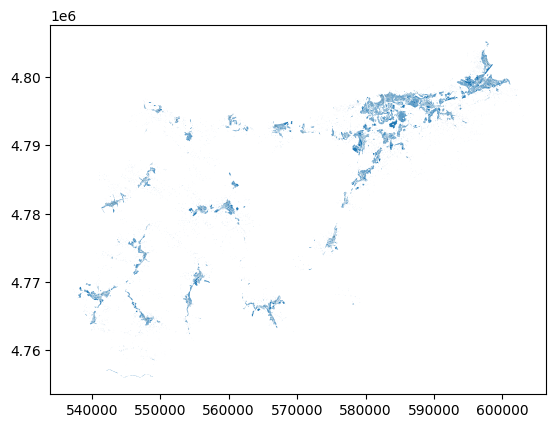

In [ ]:
buildings_2.plot()